## Evaluate Models 

Try the various types of models to determine which is the best


In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# read in csv files into pd df
month1 = pd.read_csv('Output/Vendor_M1_D.csv')
# month2 = pd.read_csv('../Output/Vendor_M2_D.csv')
# month3 = pd.read_csv('../Output/Vendor_M3_D.csv')
# month4 = pd.read_csv('../Output/Vendor_M4_D.csv')
# month5 = pd.read_csv('../Output/Vendor_M5_D.csv')
# month6 = pd.read_csv('../Output/Vendor_M6_D.csv')
# month7 = pd.read_csv('../Output/Vendor_M7_D.csv')
# month8 = pd.read_csv('../Output/Vendor_M8_D.csv')
# month9 = pd.read_csv('../Output/Vendor_M9_D.csv')
# month10 = pd.read_csv('../Output/Vendor_M10_D.csv')
# month11 = pd.read_csv('../Output/Vendor_M11_D.csv')
# month12 = pd.read_csv('../Output/Vendor_M12_D.csv')
month1.head()

,Amount,Date_of_Spend,Distance,Latitude_Recipient,Latitude_Vendor,Longitude_Recipient,Longitude_Vendor,Recipient_NUMBER,Vendor_NUMBER
0,61,01/09/2018,9.547736,36.081448,36.097426,-79.267657,-79.437501,13,10
1,152,01/18/2018,1.374235,36.091285,36.084506,-79.518872,-79.495735,14,4
2,127,01/27/2018,8.488843,36.018797,36.027530,-79.433974,-79.282459,15,3
3,236,01/11/2018,13.921190,36.091285,36.027530,-79.518872,-79.282459,16,3
4,130,01/01/2018,14.194317,36.125949,35.942825,-79.437330,-79.322221,17,2


## Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points.

$y = \theta_0 + \theta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\theta_0$ is the y-axis intercept
* $\theta_1$ is weight coefficient (slope)


In [33]:
# create linear model 
model = LinearRegression()
model

# x,y

#works but won't go into the model
# X = month1["Distance"]
# y = month1["Amount"]

# Doesn't work
# X, y = month1["Distance", "Amount"]
# X = month1[:,0]
# y = month1[:,2]
# X = np.array(x)
# y = np.array(y)

#does this mean there is a problem???
month1.shape

(9987, 9)

In [32]:
# fit the model to our data
model.fit(X, y)
print(model)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.54773636  1.37423514  8.48884344 ... 12.32570449 10.23111898
 10.07302547].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
# view the linear model (y =mx + b)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


In [8]:
# use our model to make predictions
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [9]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,100.013338,98.019704,1.993634
1,106.874190,108.458654,-1.584464
2,114.071749,107.776544,6.295205
3,91.271253,90.315201,0.956053
4,89.738865,92.047965,-2.309101
5,105.790795,100.144726,5.646069
6,100.612180,104.371286,-3.759106
7,99.344051,95.208967,4.135085
8,106.047142,102.505262,3.541880
9,120.482605,122.119661,-1.637056


In [10]:
# calculate the output response for the minimum and maximum input values
x_min = X.min()
x_max = X.max()

In [11]:
y_min_actual = y.min()
y_max_actual = y.max()

In [12]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 90.31520078064568
Calculated Min Value: 89.73886454212163
Actual Max Value: 129.85715020208258
Calculated Max Value: 129.7729907743173


In [13]:
# use predict function to calculate predicted values
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


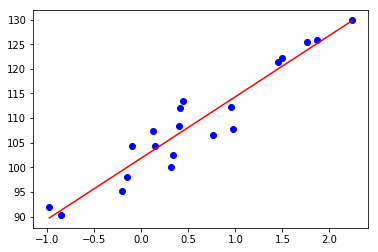

In [14]:
# show the model fit by plotting the predicted values against the original data
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [ ]:
# quantify model
from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Overall Score for the model
model.score(X, y)

In [ ]:
# test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

## Multiple Linear Regression 

Multiple Linear Regression simply means that you have more than one feature variable.

The generic formula is: $Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.
    
The equation is often written as: $Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$


In [ ]:
# import linear dataset with features
n_features = 2
X, y = month1["Distance", "Amount"]
# model
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

In [ ]:
# residuals
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

## Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data (Y/N).

We can calculate logistic regression by adding an activation function as the final step to our linear model.

This converts the linear regression output to a probability.

In [ ]:
X, y = 

In [ ]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
# create a Logistic Regression Model
classifier = LogisticRegression()
classifier

In [ ]:
# train 
classifier.fit(X_train, y_train)

#validate
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

#predictions of new data
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

## K_Nearest_Neighbors



In [ ]:
# imports
from sklearn.neighbors import KNeighborsClassifier
X = 
y = 

# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

# predictions
new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

## Support_Vector_Machine



In [ ]:
from matplotlib import style
style.use("ggplot")

In [ ]:
X =
y = 
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [ ]:
# create SVC model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

In [ ]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
#validation
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

## Support_Vector_Machine Grid



In [ ]:
X =
y =
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [ ]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

In [ ]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

In [ ]:
# List the best parameters for this dataset
print(grid.best_params_)

# List the best score
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

## Neural Network 


In [ ]:
# Generate some fake data with 3 features

y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

In [ ]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [ ]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")

## Deep Learning 

Neural Network 


In [ ]:
# deep learning
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Saving Models



In [ ]:
model.save("model.h5")

## Kmeans



In [ ]:
data = 

# Plot the data
plt.scatter(data[:, 0], data[:, 1])

In [ ]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(data)

In [ ]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')